In [2]:
import pandas as pd

df = pd.read_pickle('Results_df.pickle')
df = df.transpose()

c:\users\bsriram\appdata\local\continuum\miniconda3\envs\neur_circ_analysis\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]
c:\users\bsriram\appdata\local\continuum\miniconda3\envs\neur_circ_analysis\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log10
  
c:\users\bsriram\appdata\local\continuum\miniconda3\envs\neur_circ_analysis\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
c:\users\bsriram\appdata\local\continuum\miniconda3\envs\neur_circ_analysis\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\users\bsriram\appdata\local\continuum\miniconda3\envs\neur_circ_ana

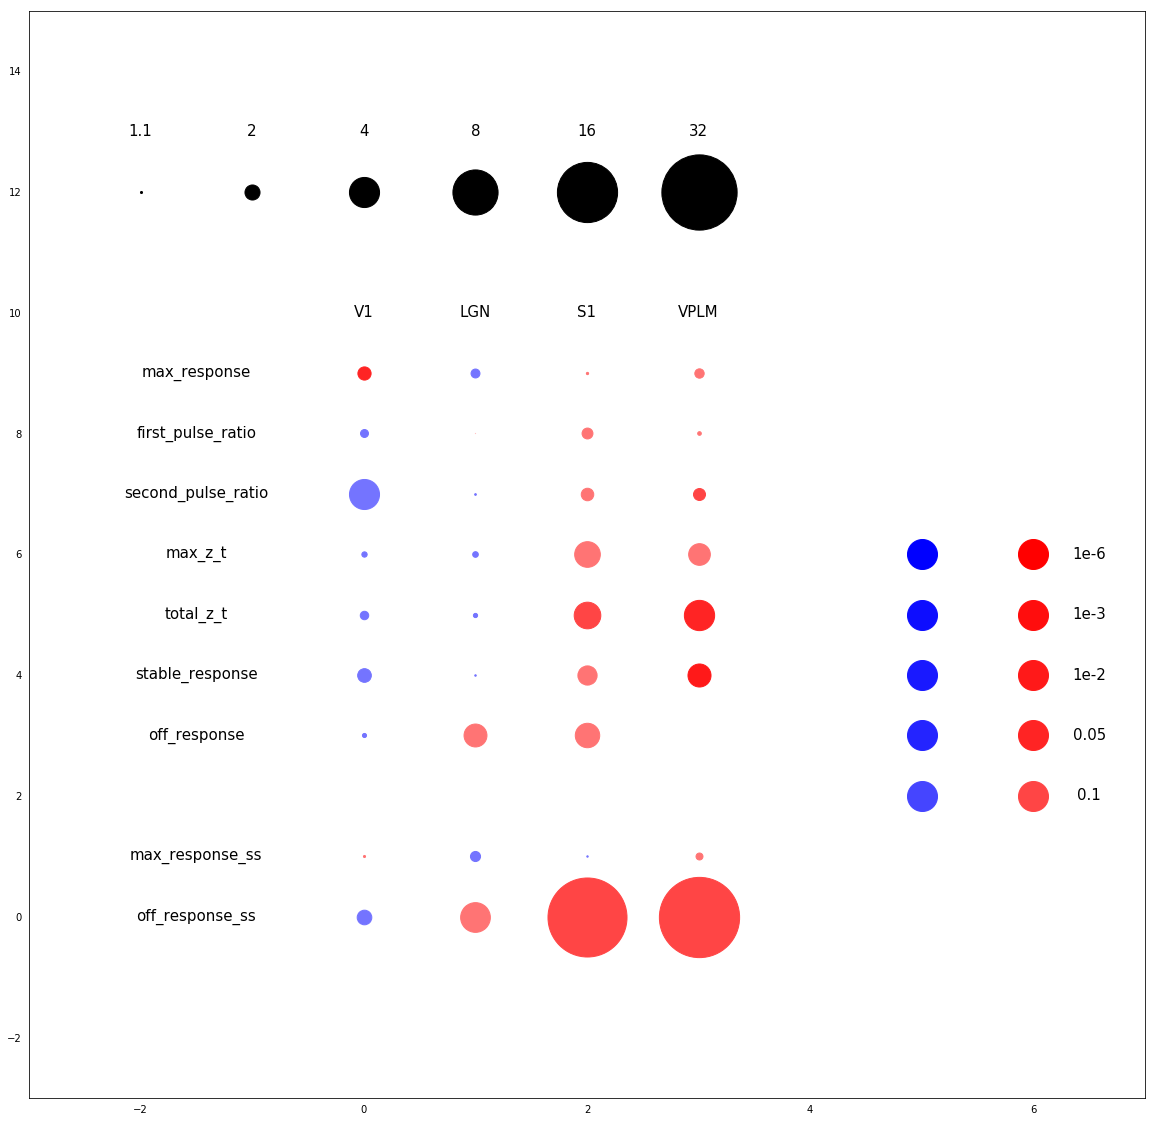

In [3]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from spike2_utils import lighten_color
fig,ax = plt.subplots(1,1,figsize=(20,20),frameon=False)
scale = 50
locations = ['V1','LGN','S1','VPLM']
features = ['max_response','first_pulse_ratio','second_pulse_ratio','max_z_t','total_z_t','stable_response','off_response',None,'max_response_ss','off_response_ss']

for i,location in enumerate(locations):
    for j,feature in enumerate(features):
        if not feature: continue
        size = np.abs(np.log10(df.loc[feature,(location,'e')]))
        if np.log10(df.loc[feature,(location,'e')])>0:
            base_color=(1.,0.,0.)
        else:
            base_color=(0.,0.,1.)
            
        if -np.log10(df.loc[feature,(location,'p')])<6:
            base_color = lighten_color(base_color,amount=0.95)
        if -np.log10(df.loc[feature,(location,'p')])<3:
            base_color = lighten_color(base_color,amount=0.95)
        if -np.log10(df.loc[feature,(location,'p')])<2:
            base_color = lighten_color(base_color,amount=0.95)
        if -np.log10(df.loc[feature,(location,'p')])<1.3:
            base_color = lighten_color(base_color,amount=0.85)
        if -np.log10(df.loc[feature,(location,'p')])<1:
            base_color = lighten_color(base_color,amount=0.75)
        ax.plot(i,9-j,'o',color=base_color,markersize=scale*size)
        
for i,location in enumerate(locations):
    ax.text(i,10,location,horizontalalignment='center',verticalalignment='center',fontsize=15)
for j,feature in enumerate(features):
    if not feature: continue
    ax.text(-1.5,9-j,feature,horizontalalignment='center',verticalalignment='center',fontsize=15)
for i,size in enumerate([1.1,2,4,8,16,32]):
    ax.plot(-2+i,12,'o',color='k',markersize=scale*np.log10(size))
    ax.text(-2+i,13,'{0}'.format(size),horizontalalignment='center',verticalalignment='center',fontsize=15)
    
base_col_red = (1.,0.,0.,)
base_col_blue = (0.,0.,1.,)
sigs = ['1e-6','1e-3','1e-2','0.05','0.1']
lightenings = [0.95,0.95,0.95,0.85,0.75]
for i,sig in enumerate(sigs):
    ax.plot(5,6-i,'o',color=base_col_blue,markersize=30)
    ax.plot(6,6-i,'o',color=base_col_red,markersize=30)
    ax.text(6.5,6-i,'{0}'.format(sig),horizontalalignment='center',verticalalignment='center',fontsize=15)
    base_col_blue = lighten_color(base_col_blue,amount = lightenings[i])
    base_col_red = lighten_color(base_col_red,amount=lightenings[i])
    
ax.set_xlim((-3, 7))
ax.set_ylim((-3, 15))
ax.tick_params(bottom="off", left="off")



In [34]:
np.log10(0.05)

-1.3010299956639813